In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import camb
from camb import model, initialpower
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
import numpy as np
import sympy as sy
from sympy import symbols
from scipy import interpolate
from scipy import optimize
import matplotlib
from matplotlib import pyplot as plt

In [14]:
##PARAMETRI INIZIALI

pars = camb.CAMBparams()  #0.022 0.122 67.5
pars.set_cosmology(H0=73, ombh2=0.023, omch2=0.111)   #H0= hubble parameter today in km/s    ombh2=physical density in baryons omch2=physical density in cold dark matter
#trovo densità diverse...
pars.InitPower.set_params(ns=0.965)  #ns = scalar spectra index (inflaction)


class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.965
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

In [15]:
Z = np.arange(0,2,0.1)

In [16]:
pars.set_matter_power(redshifts=Z, kmax=3.0)  
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)   

Note: redshifts have been re-sorted (earliest first)


In [17]:
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-2, maxkh=1e-1, npoints = 100) #nota, le z vengono ordinate, ricavo spettro di potenza

In [18]:
H0 = results.hubble_parameter(0)    #parametri di hubble
h = H0/100
def H(z):
    return results.hubble_parameter(z)

kh = kh/h  #H0 = 70km/(s*Mpc) h=0.7 ma non era senza unità di misura?
pk = pk*h**3

In [28]:


f = (results.get_fsigma8()/results.get_sigma8())
dl = results.luminosity_distance(z)

d = np.zeros(len(z))
for i,zt in enumerate(z):
    d[i] = results.comoving_radial_distance(zt)
 #la calcola alla z scelta già, UNITà DI MISURA

z = np.array(z)


In [29]:
fl= (2*dl/(1+z))/(d+(1+z)*3e5/H(z))*f

In [30]:
f1 =  interpolate.interp1d(z,fl,kind='cubic')
f2 =  interpolate.interp1d(z,f,kind='cubic')


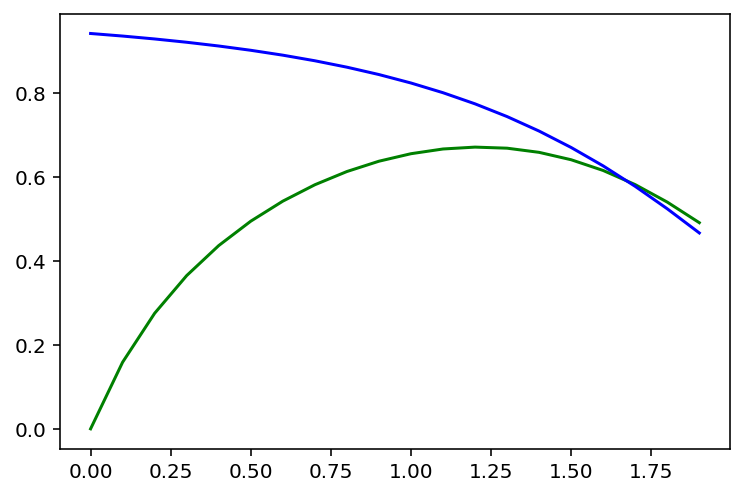

In [32]:
fit, ax = plt.subplots()
ax.plot(z,f1(z),'g', z,f2(z),'b')

